# Python for Matlab Users
    Monday, 24th June 2024, 2-4pm
    Computational Seminars @ GSE
    
https://github.com/prisae/Python4MatlabUsers

## The `;`

In Python, statements are NOT printed by default, so you do NOT have to finish every line with a `;`. On the other hand, if you **want** something to be printed, you have to explicitely print it via `print(x)`.

The notebook has an exception in that the last statement of a cell is printed, unless it is an assignment or is surpressed.

In [1]:
x = 1
# print(x)
y = 2
z = 3
# z
# z;

## Loops are different

Loops are an example of different things, amongst other, that **white space matters!**. In turn, there is no `end`.

In Matlab, you would make a loop like:

```
for i=0:4
out = 3^i
end
```

In theory, you can use any amount of whitespace for intendation, as long as you are consistent through your entire file (or cell). 

**=> Four (4) whitespace is the common intendation**.

DON'T USE TABS! (That is a common programming advice...)

In [2]:
for i in range(5):
    out = 3**i
    print(out)

1
3
9
27
81


# Line continuation

In Matlab you have the three dots `...`. You would do something like
```
a = 1 + ...
2
```

In Python, you usually use brackets and intendation (with brackets, the intendation is not well defined).


In [3]:
a = (1 +
     2)
a

3

Less common is the backslash `\`

In [4]:
a = 1 + \
    2
a

3

## Let's get started with NumPy; look at the namespace; comments

it is the common numerical library in Python, used in most things. **In NumPy, everything is a multidimensional** (nd) array (not a matrix, as in Matlab).

In Matlab, everthing is in the top namespace. In Python, things are organized in modules/packages, which you have to import. It is good style to import everything you need at the top of your functions. (There is a possibility to import everything from a module/package by using the asterix; do not do that.)

In the next cell we import the two main packages we will use today. You can also see that in Python a comment is marked by `#`, not by a `%` as in Matlab.

In [5]:
import numpy as np               # The base numerical library
import matplotlib.pyplot as plt  # For plotting; there are many alternatives

In Matlab, functions like the square root are in the top namespace
```
sqrt(4)
```

In [6]:
np.sqrt(4)

2.0

In Python/NumPy, rounded brackets `()` are for function calls; square brackets `[]` to access arrays.

In Matlab, you would do
```
a = [1, 2; 3, 4]
```

In [7]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

Matlab:
```
b = linspace(10, 100, 11)
```

In [8]:
b = np.linspace(10, 100, 10)
b

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

The default data type in python is float64:

## OO on arrays!

In [9]:
c = np.arange(24).reshape(3, 4, 2)

In [10]:
c.dtype

dtype('int64')

In [11]:
c.ndim

3

In [12]:
c.size

24

In [13]:
c.shape

(3, 4, 2)

In [14]:
c.min(), c.max()

(0, 23)

In [15]:
c.real, c.imag

(array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],
 
        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]]),
 array([[[0, 0],
         [0, 0],
         [0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0],
         [0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0],
         [0, 0],
         [0, 0]]]))

## 0-Indexing!

Python takes a lot from the `C` language, and it has therefore 0-indexing. Matlab has therefore 1-indexing.

The last element in NumPy is `-1`, not `end`. Similar, you can access any `-N` element.

Let's take above `b`-array. In Matlab, you can access the first and last index can be accessed via:
```
b(1)    % first index
b(end)  % last index
```

In [16]:
b[0], b[-1], b[-2]

(10.0, 100.0, 90.0)

## Loops

In the following a comparison of different loop structures.

### Simple loop

Matlab
```
for i=0:4
  i
end
```

In [17]:
for i in range(5):
    print(i)

0
1
2
3
4


### If - elseif/elif -- else

Matlab
```
a = 1;
% a = 2;
% a = 3;

if a == 1
  disp('a is one')
elseif a == 2
  disp('a is two')
else
  disp('a is neither one nor two')
end
```

In [18]:
a = 1
# a = 2
# a = 3

if a == 1:
    print('a is one')
elif a == 2:
    print('a is two')
else:
    print('a is neither one nor two')

a is one


In [19]:
for i in range(5):
    print(i)

0
1
2
3
4


### Loop Control

In [20]:
for i in range(600):
    print(f"Loop {i}")
    if i < 2:
        continue
    elif i > 4:
        break
    print("  =======>  we reached the end!")

Loop 0
Loop 1
Loop 2
  =======>  we reached the end!
Loop 3
  =======>  we reached the end!
Loop 4
  =======>  we reached the end!
Loop 5


## f-strings

Since Python 3.6; powerful and readable print statements.

In [21]:
x = 1
y = np.pi
z = 'neat'

print(f"This is {z}, it handles {x} and formats nicely {y:2.4f}")

This is neat, it handles 1 and formats nicely 3.1416


## Don't use numpy arrays for everything, they have an overhead

In [22]:
%%timeit

for i in np.arange(5):
    pass

1.86 µs ± 426 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [23]:
%%timeit

for i in range(5):
    pass

280 ns ± 26.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Logical operators

The Matlab operators `&&` and `||` are `and` and `or` in Python.

In [24]:
a = 1
b = 2
a == 1 and b == 1

False

In [25]:
a == 1 or b == 1

True

They only work on scalars. Otherwise you'll need the NumPy equivalents, `np.logical_{and;not;or;xor}`.

In [26]:
a = np.ones(5)
b = np.ones(5)*2
print(f"a, {a}")
print(f"b, {b}")
np.logical_and(a==1, b==1)

a, [1. 1. 1. 1. 1.]
b, [2. 2. 2. 2. 2.]


array([False, False, False, False, False])

In [27]:
np.logical_and(a==1, b==2).all()

True

In [28]:
c = np.arange(5)
print(f"c, {c}")
np.logical_and(a==1, b==c).sum()

c, [0 1 2 3 4]


1

## Help

In Matlab, you could type
```
help sqrt
```
In Python you use `?`, or tab-completion, or `??`, or hoover-over (in, e.g., Spyder).

In [29]:
np.sqrt?

Call signature:  np.sqrt(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'sqrt'>
File:            ~/mambaforge/lib/python3.11/site-packages/numpy/__init__.py
Docstring:      
sqrt(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Return the non-negative square-root of an array, element-wise.

Parameters
----------
x : array_like
    The values whose square-roots are required.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufunc result.
    Elsewhere, the `out` array 

### To the power of

In Matlab, you use `^`, in Python, you use `**`:

In [30]:
3**4

81

## In-place computations!

In [31]:
%%timeit
a = 1
for i in range(5):
    a += i
    
a

408 ns ± 34.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [32]:
%%timeit
a = 1
for i in range(5):
    a = a + i
    
a

309 ns ± 52.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


This _really_ pays out for large arrays, both in speed and in memory! And this applies for all operators, hence `+`, `-`, `*`, `/`.

## View versus copy

By default, NumPy _always_ tries to return a **view**, not a **copy**. This is powerful, but can be confusing for Matlab users.

In [33]:
a = np.array([1, 2, 3])
b = a         # A VIEW
c = a.copy()  # A COPY
a, b, c

(array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]))

In [34]:
a[1] = 100
a, b, c

(array([  1, 100,   3]), array([  1, 100,   3]), array([1, 2, 3]))

This applies also to other things, such as reshaping. E.g., `ravel` vs `flatten`:

In [35]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
b = a.ravel()    # => a flattened VIEW
c = a.flatten()  # => a flattened COPY
b, c

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [37]:
a[1, 1] = 300
b, c

(array([  0,   1,   2,   3,   4, 300,   6,   7,   8,   9,  10,  11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [38]:
b[7] = 999
a

array([[  0,   1,   2,   3],
       [  4, 300,   6, 999],
       [  8,   9,  10,  11]])

## Order

Matlab is F-ordered, Python is by default C-ordered. However, in NumPy you can define the order (and also check the order of existing arrays). You can also convert one to the other. `ravel`, `reshape` et al usually also have the `order`-argument.

In [39]:
xc = np.arange(12).reshape(3, 4)  # By default, it is C-ordered!
xc

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
xf = np.arange(12).reshape(3, 4, order='F')
xf

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [41]:
xc.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [42]:
xc.flags['C_CONTIGUOUS'], xf.flags['C_CONTIGUOUS']

(True, False)

## Division et al

In [43]:
1/2

0.5

In [44]:
np.pi//2         # Integer division; also np.floor_divide(np.pi, 2)

1.0

In [45]:
3%2              # Remainder, also np.mod(3, 2)

1

In [46]:
np.divmod(3, 2)  # Simultaneous floor division and remainder

(1, 1)

In [47]:
np.fmod(3, 2)   # Equivalent of the MATLAB ``rem`` function.

1

## Element-wise operations

In Python, everything is an array. Hence, `*` and `/` are always elementwise.

In Matlab, you need a dot `.` for that, e.g.,
```
a .* b
a ./ b
```

In Python, there is NO dot. E.g., `a.^2` is simply `a**2`.

In [48]:
a = np.array([[1, 10, 100], [1, 2, 3]])
b = np.array([[1, 1, 1], [2, 2, 2]])
a, b

(array([[  1,  10, 100],
        [  1,   2,   3]]),
 array([[1, 1, 1],
        [2, 2, 2]]))

In [49]:
a * b

array([[  1,  10, 100],
       [  2,   4,   6]])

In [50]:
a / b

array([[  1. ,  10. , 100. ],
       [  0.5,   1. ,   1.5]])

The Matlab behaviour by default is matrix operations. If you want that in Python, you need the `@` operator.

Also, the transpose in Matlab, `b'`, is obtained through `b.T` or `b.transpose()` in NumPy.

In [51]:
a @ b.transpose()

array([[111, 222],
       [  6,  12]])

## Structure

There is no direct structure-equivalent (`struct`) in Python.

You can get around it very dirty by creating a dummy class. However, I DO NOT RECOMMEND THAT.

In [52]:
class MyStruct:
    pass

a = MyStruct()
a.b = 1
a.c = np.zeros((3, 3))

I rather recommend to use dictionnaires instead to collect things.

In [53]:
a = {}
a['b'] = 1
a['c'] = np.zeros((3, 3))
a

{'b': 1,
 'c': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])}

## Functions

In [54]:
def functionname(x):
    # do stuff
    y = np.sin(x)
    return y

In [55]:
functionname(5)

-0.9589242746631385

## Classes

In [56]:
class MyClass:  # Use CamelCase for function names
    
    def __init__(self, x):
        self.x = x
        
    def multiply_me(self, y):
        return self.x * y

In [57]:
MyInstance = MyClass(3.0)
MyInstance.multiply_me(2)

6.0

## Comparison

In [58]:
a = True
if a is True:
    print('Yes')
    
if not a:
    print('No')

Yes


# Plotting

The procedural way

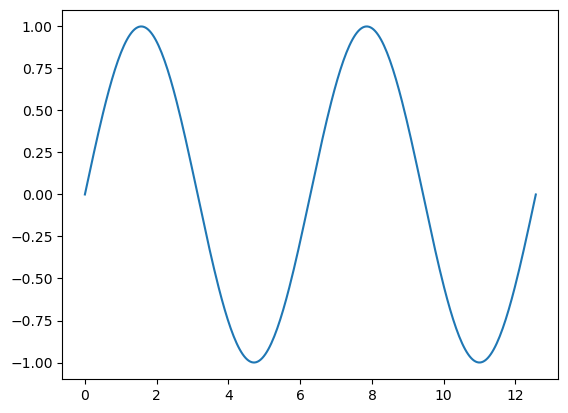

In [59]:
x = np.linspace(0, 4*np.pi, 301)

plt.figure()
plt.plot(x, np.sin(x))

The OO way.

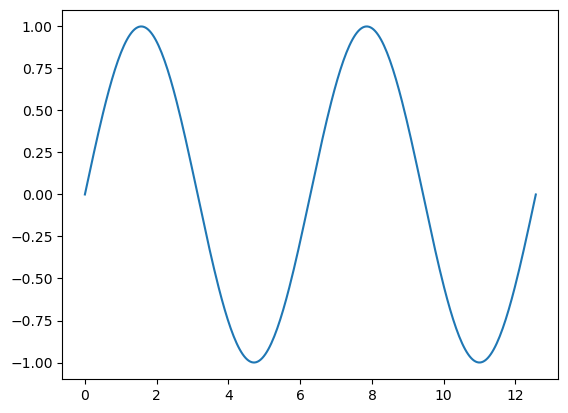

In [60]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, np.sin(x))

## Common things not (yet) covered

- `with`
- `yield`
- `try` - `except` - `else`
- `assert`
- `raise`
- `ravel`, `flatten`, `squeeze`
- `copy`
- slicing and broadcasting
- list comprehension
- lists and tuples, dicts

In [61]:
# For easier reproducibility
try:
    from scooby import Report    
except ModuleNotFoundError as e:
    class Report:
        def __init__(self, *args, **kwargs):
            pass
        def _repr_html_(self):
            return 'For the `Report()` you need to install `scooby`!'

Report()

--------------------------------------------------------------------------------
  Date: Sun Jun 23 16:22:38 2024 CEST

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GiB
       Environment : Jupyter
       File system : ext4

  Python 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC
  12.2.0]

             numpy : 1.26.4
             scipy : 1.12.0
           IPython : 8.22.1
        matplotlib : 3.7.2
            scooby : 0.7.2
--------------------------------------------------------------------------------